Large sample theory

### Large of Large Numbers

This script demonstrates the law of large numbers (LLN) along with the underlying assumptions.

Write a function to generate the sample mean given the sample size $n$ and the distribution.
We allow three distributions, namely, $N(0,1)$, $t(2)$ and Cauchy.

In [1]:
sample.mean = function( n, distribution ){
  # get sample mean for a given distribution
  if (distribution == "normal"){ y = rnorm( n ) } 
  else if (distribution == "t2") {y = rt(n, 2) }
  else if (distribution == "cauchy") {y = rcauchy(n) }
  return( mean(y) )
}

This function plots the sample mean over the path of geometrically increasing sample size.

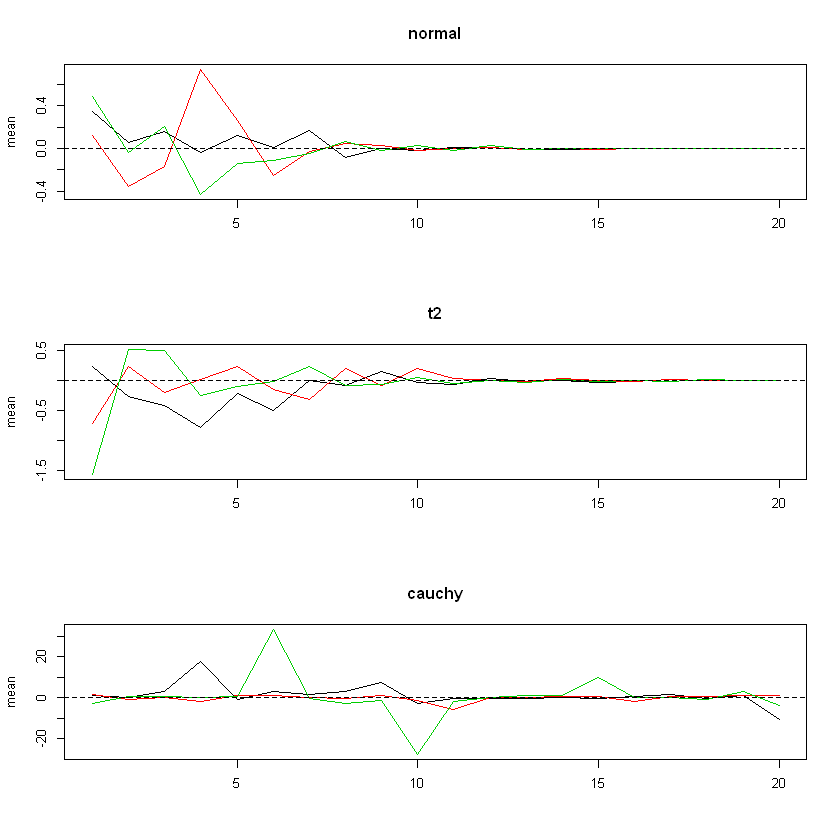

In [2]:
LLN.plot = function(distribution){
  # draw the sample mean graph
  ybar = matrix(0, length(NN), 3 )
  for (rr in 1:3){
    for ( ii in 1:length(NN)){
      n = NN[ii]; ybar[ii, rr] = sample.mean(n, distribution)
    }  
  }
  matplot(ybar, type = "l", ylab = "mean", xlab = "", 
       lwd = 1, lty = 1, main = distribution)
  abline(h = 0, lty = 2)
  return(ybar)
}
# calculation
NN = 2^(1:20); set.seed(2020-10-7); par(mfrow = c(3,1))
l1 = LLN.plot("normal"); l2 = LLN.plot("t2"); l3 = LLN.plot("cauchy")

### Central Limit Theorem

The sample size is chosen as $2^x$, where $x=1:20$. We have the following observations.

* When the distribution is $N(0,1)$, the Chebyshev LLN works. The sample mean converges fast.
* When the distribution is $t(2)$, which has zero mean but infinite variance, the Kolmogorov LLN works. The sample mean still converges, though more slowly than the $N(0,1)$ case.
* The Cauchy distribution has no moment at any order. The sample mean does not converge no matter how large is the sample size.


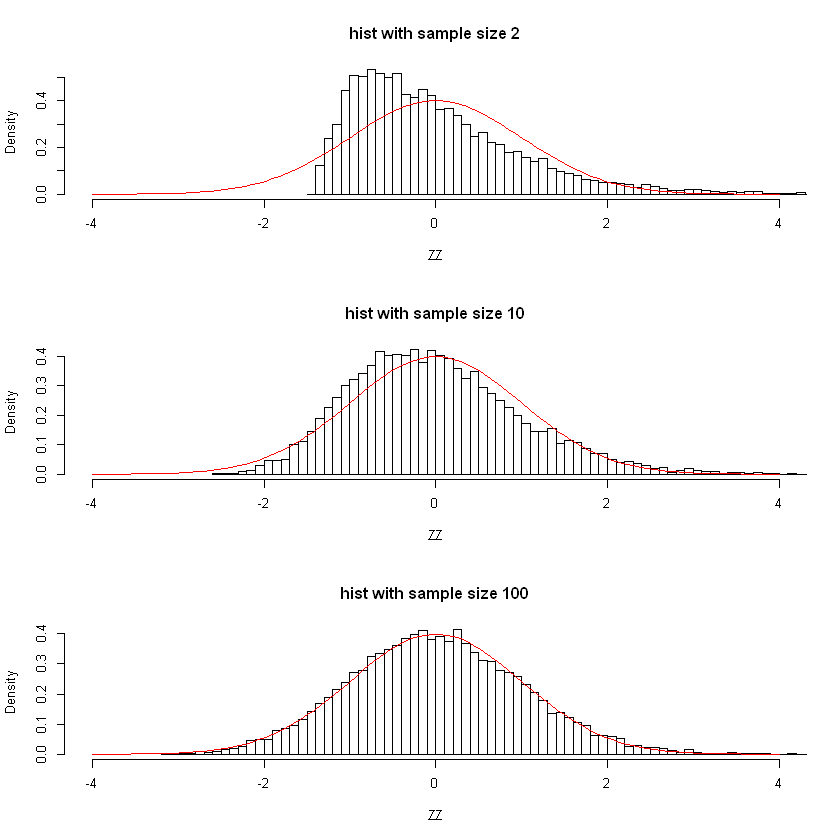

In [3]:
Z_fun = function(n, distribution){
  if (distribution == "normal"){
      z = sqrt(n) * mean(rnorm(n))
	} else if (distribution == "chisq2") {
      df = 2; 
      x = rchisq(n,2)
      z = sqrt(n) * ( mean(x) - df ) / sqrt(2*df)
      }
  return (z)
}
CLT_plot = function(n, distribution){
  Rep = 10000
  ZZ = rep(0, Rep)
  for (i in 1:Rep) {ZZ[i] = Z_fun(n, distribution)}

  xbase = seq(-4.0, 4.0, length.out = 100)
  hist( ZZ, breaks = 100, freq = FALSE, 
    xlim = c( min(xbase), max(xbase) ),
    main = paste0("hist with sample size ", n) )
  lines(x = xbase, y = dnorm(xbase), col = "red")
  return (ZZ)
}

par(mfrow = c(3,1))
phist = CLT_plot(2, "chisq2")
phist = CLT_plot(10, "chisq2")
phist = CLT_plot(100, "chisq2")